In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("housing.csv")

In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
np.mean(df.total_bedrooms)

537.8705525375618

In [5]:
df1=df.fillna(np.mean(df.total_bedrooms))

In [6]:
df1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df1.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe=OneHotEncoder()
categorial_encoding=ohe.fit_transform(df1[['ocean_proximity']])

In [10]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [11]:
categorial_encoding.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [12]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [13]:
df_cat_to_num= pd.DataFrame(categorial_encoding.toarray(), columns=ohe.get_feature_names_out(), index=df1.index)

In [14]:
df2=pd.concat([df1,df_cat_to_num], axis=1)

In [15]:
df2.drop('ocean_proximity',axis=1,inplace=True)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df2_train, df2_test= train_test_split(df2, test_size=0.2, random_state=42)

In [18]:
df2_train.shape, df2_test.shape

((16512, 14), (4128, 14))

In [19]:
df2_train_target=df2_train['median_house_value']
df2_train_set=df2_train.drop('median_house_value',axis=1)
df2_test_target=df2_test['median_house_value']
df2_test_set=df2_test.drop('median_house_value', axis=1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()
model.fit(df2_train_set, df2_train_target)

LinearRegression()

In [22]:
prediction=model.predict(df2_test_set)

In [23]:
prediction

array([ 40707.74006233, 264795.53686603, 384098.54114309, ...,
       184225.2700349 , 385289.89898441, 244860.53555181])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
mse=mean_squared_error(df2_test_target,prediction)

In [26]:
r2 = r2_score(df2_test_target, prediction)

In [27]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 4865607182.037054
R-squared Score: 0.6490111896409535


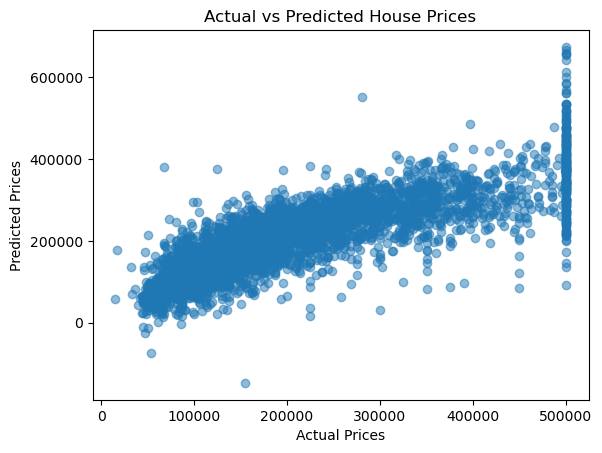

In [30]:
plt.scatter(df2_test_target, prediction, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()